In [28]:
import os, glob
import config
import pandas as pd
from tqdm.auto import tqdm
import seaborn as sns
sns.set(style='darkgrid')

# Data Analysis

In [45]:
def from_chunks_to_analysis():
    files = glob.glob('../data/patentsview/chunks/*.csv')
    df = pd.DataFrame(columns=['label', 'token_length'])
    progress_bar = tqdm(range(len(files)))
    for file in files:
        data = pd.read_csv(file, usecols=['label', 'token_length'])
        df = pd.concat([df, data])
        progress_bar.update(1)
    df.to_csv('../data/patentsview/meta/label_analysis.csv', index=None)

In [46]:
df = pd.read_csv('../data/patentsview/meta/label_analysis.csv')

In [51]:
# ID to letter representation of labels
df['label'] = df['label'].apply(lambda x: config.id2label[x])

In [53]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 162696 entries, 0 to 162695
Data columns (total 2 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   label         162696 non-null  object 
 1   token_length  162696 non-null  float64
dtypes: float64(1), object(1)
memory usage: 2.5+ MB


In [52]:
df.describe()

,token_length
count,162696.000000
mean,2319.382837
std,942.058774
min,512.000000
25%,1543.000000
50%,2278.000000
75%,3088.000000
max,4094.000000


<AxesSubplot:xlabel='token_length', ylabel='Count'>

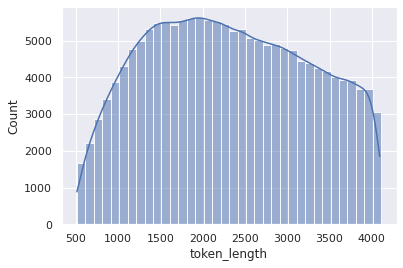

In [54]:
# Histogram of token_length value
sns.histplot(data=df, x='token_length', binwidth=100, kde=True)

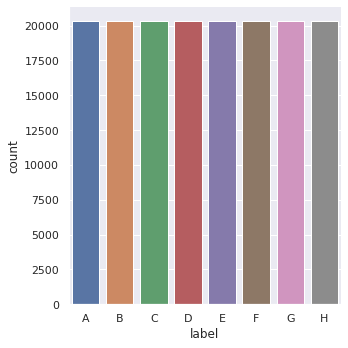

In [55]:
# Perpectly balanced data.
sns.catplot(data=df, x="label", kind="count", order=config.labels_list)

In [56]:
# Mean token lengths of patents grouped by labels.

mean_list = []
for label in config.labels_list:
    mean = round(df[df['label']== label]['token_length'].mean()) 
    mean_list.append(mean)
    print("Mean token length of label {} is {}".format(label, mean))

Mean token length of label A is 2245
Mean token length of label B is 2251
Mean token length of label C is 2343
Mean token length of label D is 2256
Mean token length of label E is 2238
Mean token length of label F is 2242
Mean token length of label G is 2528
Mean token length of label H is 2453


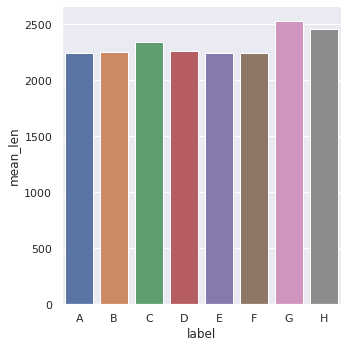

In [57]:
# The table of mean token lengths of patents grouped by labels.

mean_table = pd.DataFrame(data={"label":config.labels_list, "mean_len":mean_list})
sns.catplot(data=mean_table, x='label', y='mean_len', kind='bar')

In [58]:
# Finally see the describe values for each label separately.
for label in config.labels_list:
    print("Label: {}".format(label))
    print(df[df['label']== label].describe())
    print("-----------------------------------")

Label: A
       token_length
count  20339.000000
mean    2245.010767
std      949.598381
min      512.000000
25%     1456.000000
50%     2164.000000
75%     3019.000000
max     4094.000000
-----------------------------------
Label: B
       token_length
count  20339.000000
mean    2250.629185
std      928.423290
min      512.000000
25%     1492.000000
50%     2184.000000
75%     2983.000000
max     4094.000000
-----------------------------------
Label: C
       token_length
count  20339.000000
mean    2342.887949
std      971.514297
min      512.000000
25%     1538.500000
50%     2331.000000
75%     3153.000000
max     4094.000000
-----------------------------------
Label: D
       token_length
count  20323.000000
mean    2256.207991
std      940.469631
min      512.000000
25%     1482.500000
50%     2195.000000
75%     3011.500000
max     4094.000000
-----------------------------------
Label: E
       token_length
count  20339.000000
mean    2237.576675
std      925.085266
min      51

# Vocab Analysis

In [2]:
vocab = pd.read_csv(os.path.join('../',config.data_dir, 'meta/vocab.csv'))

In [6]:
vocab.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8207617 entries, 0 to 8207616
Data columns (total 2 columns):
 #   Column  Dtype 
---  ------  ----- 
 0   word    object
 1   freq    int64 
dtypes: int64(1), object(1)
memory usage: 125.2+ MB


In [7]:
vocab.describe()

,freq
count,8.207617e+06
mean,5.363644e+01
std,1.627207e+04
min,1.000000e+00
25%,1.000000e+00
50%,1.000000e+00
75%,2.000000e+00
max,3.605948e+07


In [12]:
vocab.sort_values(by='freq', ascending=False)

,word,freq
1,the,36059476
37,of,16204806
32,a,11521326
19,to,10061354
60,and,9768397
...,...,...
3743178,"part79,",1
3743177,part79moves,1
3743176,faces71and71′.,1
3743175,faces71and71′,1


In [20]:
trimmed_vocab = vocab[vocab['freq']>2]

In [21]:
trimmed_vocab.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1650778 entries, 0 to 8207598
Data columns (total 2 columns):
 #   Column  Non-Null Count    Dtype 
---  ------  --------------    ----- 
 0   word    1650772 non-null  object
 1   freq    1650778 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 37.8+ MB


In [22]:
trimmed_vocab.describe()

,freq
count,1.650778e+06
mean,2.620151e+02
std,3.628259e+04
min,3.000000e+00
25%,3.000000e+00
50%,5.000000e+00
75%,1.200000e+01
max,3.605948e+07


<AxesSubplot:xlabel='freq', ylabel='Count'>

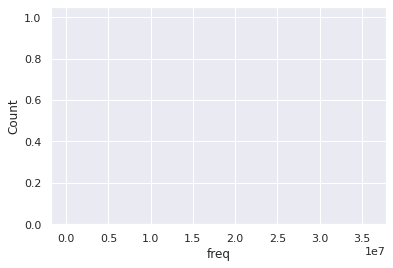

In [24]:
sns.histplot(data=trimmed_vocab[:10], x='freq', binwidth=1)